In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dat = pd.read_csv("fortune1000.csv",index_col="Rank")

The Fortune 1000 are the 1,000 largest American companies ranked by revenues, as compiled by the American business magazine Fortune. We are going to group the data by the Sector in which each company belongs.

In [9]:

dat.head()

,Company,Sector,Industry,Location,Revenue,Profits,Employees
Rank,,,,,,,
1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130,14694,2300000
2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600
3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715,53394,110000
4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000
5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241,1476,70400


In [3]:
sectors = dat.groupby("Sector")

In [10]:
## WE HAVE CREATED A GROUPBY OBJECT, CONSISTING OF 21 SECTORS
len(sectors)

21

In [4]:
##WE GET EACH SECTOR AND THE NUMBER OF ITS ROWS
sectors.size()

Sector
Aerospace & Defense              20
Apparel                          15
Business Services                51
Chemicals                        30
Energy                          122
Engineering & Construction       26
Financials                      139
Food and Drug Stores             15
Food, Beverages & Tobacco        43
Health Care                      75
Hotels, Resturants & Leisure     25
Household Products               28
Industrials                      46
Materials                        43
Media                            25
Motor Vehicles & Parts           24
Retailing                        80
Technology                      102
Telecommunications               15
Transportation                   36
Wholesalers                      40
dtype: int64

In [5]:
##WE GET THE SUM OF REVENUE OF EACH SECTOR AND SORT THE VALUES IN ASCENDING ORDER.
##SO WE SEE THAT THE FIANANCIALS SECTOR 
##HAS THE HIGHEST REVENUE.
sectors['Revenue'].sum().sort_values()

Sector
Apparel                           95968
Engineering & Construction       153983
Hotels, Resturants & Leisure     169546
Media                            220764
Household Products               234737
Chemicals                        243897
Materials                        259145
Business Services                272195
Aerospace & Defense              357940
Transportation                   408508
Wholesalers                      444800
Telecommunications               461834
Motor Vehicles & Parts           482540
Food and Drug Stores             483769
Industrials                      497581
Food, Beverages & Tobacco        555967
Technology                      1377600
Retailing                       1465076
Energy                          1517809
Health Care                     1614707
Financials                      2217159
Name: Revenue, dtype: int64

In [ ]:
##We are going to create a new data frame consisting of a list 
##of the Company of each Sector, that has the highest Revenue.

In [9]:
df = pd.DataFrame(columns=dat.columns)

In [10]:
for sector,data in sectors:
    highest_revenue_value = data.nlargest(1,"Revenue")
    df = df.append(highest_revenue_value)

In [11]:
df


,Company,Sector,Industry,Location,Revenue,Profits,Employees
24,Boeing,Aerospace & Defense,Aerospace and Defense,"Chicago, IL",96114,5176,161400
91,Nike,Apparel,Apparel,"Beaverton, OR",30601,3273,62600
144,ManpowerGroup,Business Services,Temporary Help,"Milwaukee, WI",19330,419,27000
56,Dow Chemical,Chemicals,Chemicals,"Midland, MI",48778,7685,49495
2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600
155,Fluor,Engineering & Construction,"Engineering, Construction","Irving, TX",18114,413,38758
4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000
7,CVS Health,Food and Drug Stores,Food and Drug Stores,"Woonsocket, RI",153290,5237,199000
41,Archer Daniels Midland,"Food, Beverages & Tobacco",Food Production,"Chicago, IL",67702,1849,32300
5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241,1476,70400


In [22]:
##We are setting the index of the data frame to be the Company column.
final_dat = df.set_index(keys="Company")

In [26]:
plt.style.use("ggplot")

<AxesSubplot:ylabel='Company'>

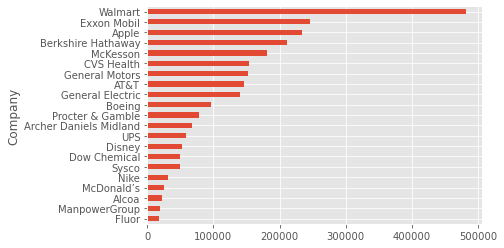

In [27]:
##Finally we plot the 21 companies with the highest Revenues in ascending order.
final_dat["Revenue"].sort_values().plot(kind="barh")